<b>Задание 1.</b> Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения (eta) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?

In [2]:
import numpy as np
import math
import random

# Plotter:---------------------------------------------------------
import matplotlib.pyplot as plt

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
#--------------(plotter)-------------------------------------------

random.seed(42)
np.random.seed(42)




In [3]:

def max_min (X) : 
    max = np.amax(X)
    min = np.amin(X)
    return max,min

def calculate_uniform_a_b (mean=0,std_deviation=1) :
    c = 3 ** 0.5
    a = mean - c*std_deviation
    b = mean + c*std_deviation
    return a,b

def make_random_vector (mean=0,std_deviation=1,coordinate_number = 2, is_normal=True) :
    if (is_normal):
        return np.random.normal(mean,std_deviation,size=(coordinate_number))
    else :
        a,b = calculate_uniform_a_b(mean,std_deviation)
        return np.random.uniform(a,b,size=(coordinate_number))
    
def make_random_matrix (mean=0,std_deviation=1,row_number = 2, column_number = 2, is_normal=True) :
    if (is_normal):
        return np.random.normal(mean,std_deviation,size=(row_number,column_number))
    else :
        a,b = calculate_uniform_a_b(mean,std_deviation)
        return np.random.uniform(a,b,size=(row_number,column_number))
    
class LinearFunction :
    def __init__ (self,weights,threshold) :
        self.weights = weights
        self.threshold = threshold
    
    def reset_by_random ( self, weight_number, mean, std_deviation ):
        self.weights = make_random_vector( mean, std_deviation, weight_number, is_normal=True )
        a,b = calculate_uniform_a_b(mean,std_deviation)
        self.threshold = random.uniform(a,b)
        return self;
    
    def calculate (self,x):
        return np.dot(x,self.weights)+self.threshold
    
    def correct(self,dw,etta,dt):
        #copied_weights = self.weights.copy();
        #copied_treshold = self.threshold+0.0;
        self.weights+=dw*etta
        self.threshold+=dt*etta
        return self;
        #return copied_weights,copied_treshold
    
    def calculate_with_delta(self,x,y):
        return self.calculate(x)-y
    
    def calculate_with_error(self,x,y):
        result = self.calculate_with_delta(x,y) ** 2
        return result/2
    
def make_linear_correlated_data (mean,std_deviation,noise_deviation,coordinate_number,data_object_number) :
    
    linear_function = LinearFunction (None,None).reset_by_random(coordinate_number,mean,std_deviation)
    vectors = make_random_matrix(mean,std_deviation,data_object_number,coordinate_number,is_normal=True)
    
    weighted_vectors = linear_function.calculate(vectors)
    noised_weighted_vectors = weighted_vectors + make_random_vector(0,noise_deviation,data_object_number,is_normal=True)
    
    return noised_weighted_vectors,vectors,linear_function;
    

#nvs,vs,lf = make_linear_correlated_data(0,3,2,10)
#vs


1000_e=0.35106306659203296_v=[-2.39904013e-07]__dv1=4.879568446824172e-09___dv2=4.798080256974996e-09__eps=0.016699876379889997
2000_e=0.35106312217955477_v=[-8.80458909e-15]__dv1=1.7956366628895371e-16___dv2=1.7609178174511713e-16__eps=0.019335117262807684
2051_e=0.35106312217955593_v=[-2.70655802e-15]__dv1=5.413116048914558e-17___dv2=5.413116048914558e-17__eps=0.0
max_distance=1.3875330749812569


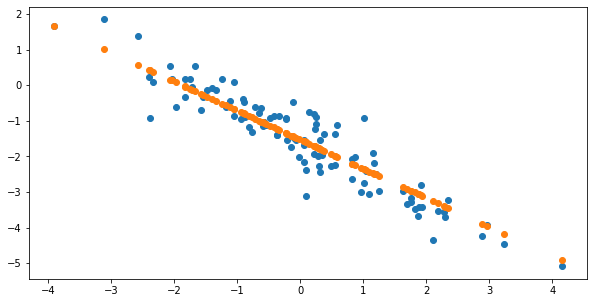

In [128]:

    
class LinearRegression :
    
    def __init__ (self):
        self.linear_function = None;
    
    def fit (self, X,Y,e_min,etta):
        self.initialize(X);
        
        self.adapt(X,Y,e_min,etta);
        return self;
        
    def predict (self,X):
        return self.linear_function.calculate(X)
        
    def initialize (self,X):
        max,min = max_min(X)
        self.linear_function = LinearFunction(None,None).reset_by_random(X.shape[1],0.0,(max-min)/1000)
        return self;
        
    def adapt (self, X, Y, e_min=0.1,etta=0.00001):
        
        iteration_cnt = 0
        iteration_cnt_max = 10000000
        er1=0.0
        er2=0.0
        
        while True:
            
            dE_dT_scalar = 0.0
            dE_dW_vector = np.zeros(X.shape[1])
            error_scalar = 0.0
            
            # Iterating by all objects and accumulate the gradient correction:------
            for k in range(0,Y.size):
                error_scalar += self.linear_function.calculate_with_error(X[k],Y[k])
                dE_dT_scalar += self.linear_function.calculate_with_delta(X[k],Y[k])
                dE_dW_vector += X[k]*dE_dT_scalar
            #-----------------------------------------------------------------------
            
            dE_dT_scalar/=Y.size
            dE_dW_vector/=Y.size
            error_scalar=(error_scalar/Y.size)**0.5
            max_distance = abs(np.amax(Y)- np.amin(Y))/5
            
            self.linear_function.correct(dE_dW_vector,-1*etta,dE_dT_scalar)
            er1 = er2;
            er2 = np.linalg.norm(dE_dW_vector*etta, ord=2);
            eps = abs(er1-er2)/max(er1,er2);
            iteration_cnt += 1
            if iteration_cnt % 1000==0:
                print ("{}_e={}_v={}__dv1={}___dv2={}__eps={}".format(iteration_cnt,error_scalar,dE_dW_vector,er1,er2,eps))
            if iteration_cnt>=iteration_cnt_max:
                print ("{}_e={}_v={}__dv1={}___dv2={}__eps={}".format(iteration_cnt,error_scalar,dE_dW_vector,er1,er2,eps))
                print ("  --> The max iteration number was achieved. The end!")
                break
            if (eps<e_min and error_scalar<max_distance) or eps==0.0:
                print ("{}_e={}_v={}__dv1={}___dv2={}__eps={}".format(iteration_cnt,error_scalar,dE_dW_vector,er1,er2,eps))
                print ("max_distance={}".format(max_distance))
                break;
                
        return self;

    
Y,X,l = make_linear_correlated_data( mean =0, std_deviation =1.5,noise_deviation=0.5, coordinate_number =1,data_object_number =100)
etta = 0.02
linear_regression = LinearRegression().fit(X,Y,0.0001,etta)
Y_predict = linear_regression.predict(X);

plt.scatter(X,Y)
plt.scatter(X,Y_predict)
    
#lf = LinearFunction([1,0],-1);
#lf.calculate([[1,0],[0,1]])

<b>Задание 2</b> (*) В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:
<br>w = np.array([1, 0.5])
<br>for i in range(1001):
<br>    y_pred = np.dot(w, X.T)
<br>    err = calc_mse(y, y_pred)
<br>    w -= (eta * (1/n * 2 * np.sum(X.T * (y_pred - y)))) # ошибка!
<br>    if i % 100 == 0:
<br>        print(i, w, err)

<b>Ответ:</b> np.sum(X.T * (y_pred - y))) - написано суммирование вектора с матрицей, а должно быть умножение транспонированной матрицы на вектор. Это даст необходимое перемножение координат и суммирование по столбцам, что в свою очередь эквивалентно накопленной суммарной ошибке, по образу которой как раз и составлялась исходная формула. В методичке об этом написано коряво, однако при разборе кода это становится очевидно

<b>Задание 3</b>(*). Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере diff=1e-6, а значение eta=1e-2?

<b>Ответ:</b> Шаг в 0.01 уже является сравнительно большим, а ошибка мала, поэтому возможно два исхода мы либо сразу попадаем в точку минимума и выходим, либо проскакиваем минимум и начинаем блуждание в его окрестности. Правда стоит отметить что для больших шагов возможно не только блуждание но и полная расходимость алгоритма, когда вместо убыли ошибки начинается ее рост вплоть до inf.